**Binary Sentiment**
- Converts the polarity scores from VADERsentiment from being between -1 and 1 to being -1 OR 1

In [1]:
import pandas as pd
import numpy as np

In [ ]:
def binary_sentiment(non_bin_sent):
    """
    Creates a binarised sentiment score from the polarity scores given by VADER.
    Expects a list as input.
    """
    
    bin_sent = []
    
    for i in range(len(non_bin_sent)):
        if non_bin_sent[i] < 0:
            bin_sent.append(-1)
        else:
            bin_sent.append(1)
    
    return bin_sent

**Text Pre-Processing**

In [2]:
#Required modules
import spacy

In [3]:
#Lemmatization w/spacy
def space(comment):
    nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
    doc = nlp(comment)
    return " ".join([token.lemma_ for token in doc])

In [4]:
data = pd.read_csv("/Users/aashrit/Documents/Masters/MY498/Data/Reddit/test.csv")

In [14]:
#Required modules
import re
import pandas as pd
import nltk
from nltk.corpus import stopwords

In [15]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aashrit/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [16]:
#https://towardsdatascience.com/cleaning-preprocessing-text-data-for-sentiment-analysis-382a41f150d6

def pre_process(data):
    """
    Implements relevant text pre-processing for posts/comments,
    used prior to conducting sentiment analysis.
    Expects a dataframe as input.
    """
    #Making all text lowercase
    data_clean = data.apply(lambda x: " ".join(x.lower() for x in x.split()))
    
    #Removing punctuation
    data_clean = data_clean.str.replace('[^\w\s]','')
    
    #Removing stopwords
    stop = stopwords.words('english')
    data_clean = data_clean.apply(lambda x: " ".join(x for x in x.split() if x not in stop))
    
    #Spacy Lemmatization
    data_clean = data_clean.apply(space)
    
    return data_clean

In [17]:
pre_process(data['body'])

/Users/aashrit/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: FutureWarning: The default value of regex will change from True to False in a future version.
  del sys.path[0]


KeyboardInterrupt: 

**VADER Sentiment**

In [30]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [31]:
def vader_score(data):
    """
    Generates sentiment scores for a given set of text data (posts/comments)
    using VADERsentiment.
    Expects a dataframe column as input.
    """
    
    analyser = SentimentIntensityAnalyzer()
    
    senti_score = []
    
    for i in data:
        senti_score.append(list(analyser.polarity_scores(i).values())[-1])
        
    return senti_score

**TextBlob Sentiment**

In [5]:
from textblob import TextBlob

In [18]:
def textblob_score(data):
    
    senti_score = []
    
    for i in data:
        polarity = TextBlob(i).sentiment.polarity
        senti_score.append(polarity)
        
    return senti_score

In [12]:
data = pd.read_csv("/Users/aashrit/Documents/Masters/MY498/Data/Reddit/test.csv")

**Epoch Time to Conventional**

In [27]:
def epoch_time_convert(data):
    
    data_converted = pd.to_datetime(data,unit='s',dayfirst=True)
    
    for i in data_converted:
        i = str(i)

#    data_converted = 
    
    return data_converted

In [28]:
data

,Unnamed: 0,all_awardings,archived,associated_award,author,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,...,stickied,subreddit,subreddit_id,subreddit_name_prefixed,subreddit_type,top_awarded_type,total_awards_received,treatment_tags,unrepliable_reason,attention_score
0,0,[],False,NaN,AcanthisittaFit1066,NaN,points,[],fcb4f480-ccb2-11e4-8c0e-22000b339303,5,...,False,UKPersonalFinance,t5_2wkka,r/UKPersonalFinance,public,NaN,0,[],NaN,0.001626
1,1,[],False,NaN,traumascares,NaN,points,[],fcb4f480-ccb2-11e4-8c0e-22000b339303,27,...,False,UKPersonalFinance,t5_2wkka,r/UKPersonalFinance,public,NaN,0,[],NaN,0.000712
2,2,[],False,NaN,Luke_Surl,NaN,points,[],fcb4f480-ccb2-11e4-8c0e-22000b339303,13,...,False,UKPersonalFinance,t5_2wkka,r/UKPersonalFinance,public,NaN,0,[],NaN,0.001199
3,3,[],False,NaN,fightmaxmaster,NaN,points,[],fcb4f480-ccb2-11e4-8c0e-22000b339303,103,...,False,UKPersonalFinance,t5_2wkka,r/UKPersonalFinance,public,NaN,0,[],NaN,0.002950
4,4,[],False,NaN,Wonderful_Nerve_8308,NaN,NaN,[],NaN,NaN,...,False,UKPersonalFinance,t5_2wkka,r/UKPersonalFinance,public,NaN,0,[],NaN,0.004405
5,5,[],False,NaN,beepboopbananas3298,NaN,points,[],fcb4f480-ccb2-11e4-8c0e-22000b339303,5,...,False,UKPersonalFinance,t5_2wkka,r/UKPersonalFinance,public,NaN,0,[],NaN,0.004739
6,6,[],False,NaN,Narradisall,NaN,points,[],fcb4f480-ccb2-11e4-8c0e-22000b339303,60,...,False,UKPersonalFinance,t5_2wkka,r/UKPersonalFinance,public,NaN,0,[],NaN,0.001770
7,7,[],False,NaN,Crot4le,NaN,points,[],fcb4f480-ccb2-11e4-8c0e-22000b339303,19,...,False,UKPersonalFinance,t5_2wkka,r/UKPersonalFinance,public,NaN,0,[],NaN,0.003175
8,8,[],False,NaN,hmm_interestingg,NaN,points,[],fcb4f480-ccb2-11e4-8c0e-22000b339303,-,...,False,UKPersonalFinance,t5_2wkka,r/UKPersonalFinance,public,NaN,0,[],NaN,0.003460
9,9,[],False,NaN,Crypto-hercules,NaN,NaN,[],NaN,NaN,...,False,UKPersonalFinance,t5_2wkka,r/UKPersonalFinance,public,NaN,0,[],NaN,0.004098


In [29]:
data['created'] = epoch_time_convert(data['created_utc'])

In [30]:
def date_shorten(data):
    
    data = data.astype({"created":str},errors='raise')
    
    for i in range(len(data)):
        data['created'][i] = data['created'][i][:10]
        
    data = data.sort_values('created')
    
    return data
    
data = date_shorten(data)

/Users/aashrit/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [31]:
data

,Unnamed: 0,all_awardings,archived,associated_award,author,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,...,subreddit,subreddit_id,subreddit_name_prefixed,subreddit_type,top_awarded_type,total_awards_received,treatment_tags,unrepliable_reason,attention_score,created
24,24,[],False,NaN,aintbroke_dontfixit,NaN,points,[],fcb4f480-ccb2-11e4-8c0e-22000b339303,6,...,UKPersonalFinance,t5_2wkka,r/UKPersonalFinance,public,NaN,0,[],NaN,0.005236,2022-06-04
22,22,[],False,NaN,wealthsteer,NaN,NaN,[],NaN,NaN,...,UKPersonalFinance,t5_2wkka,r/UKPersonalFinance,public,NaN,0,[],NaN,0.001200,2022-06-04
23,23,[],False,NaN,Scary-Ad-7336,NaN,NaN,[],NaN,NaN,...,UKPersonalFinance,t5_2wkka,r/UKPersonalFinance,public,NaN,0,[],NaN,0.018182,2022-06-04
21,21,[],False,NaN,audigex,NaN,points,[],fcb4f480-ccb2-11e4-8c0e-22000b339303,139,...,UKPersonalFinance,t5_2wkka,r/UKPersonalFinance,public,NaN,0,[],NaN,0.001193,2022-06-05
20,20,[],False,NaN,AcanthisittaSweaty16,NaN,points,[],fcb4f480-ccb2-11e4-8c0e-22000b339303,0,...,UKPersonalFinance,t5_2wkka,r/UKPersonalFinance,public,NaN,0,[],NaN,0.005376,2022-06-05
19,19,[],False,NaN,BadInternal2241,NaN,points,[],fcb4f480-ccb2-11e4-8c0e-22000b339303,26,...,UKPersonalFinance,t5_2wkka,r/UKPersonalFinance,public,NaN,0,[],NaN,0.019231,2022-06-05
18,18,[],False,NaN,arcadyk,NaN,points,[],fcb4f480-ccb2-11e4-8c0e-22000b339303,1,...,UKPersonalFinance,t5_2wkka,r/UKPersonalFinance,public,NaN,0,[],NaN,0.001613,2022-06-05
17,17,[],False,NaN,pflurklurk,NaN,points,[],fcb4f480-ccb2-11e4-8c0e-22000b339303,3557,...,UKPersonalFinance,t5_2wkka,r/UKPersonalFinance,public,NaN,0,[],NaN,0.001504,2022-06-05
16,16,[],False,NaN,Daca7,NaN,points,[],fcb4f480-ccb2-11e4-8c0e-22000b339303,0,...,UKPersonalFinance,t5_2wkka,r/UKPersonalFinance,public,NaN,0,[],NaN,0.000852,2022-06-05
15,15,[],False,NaN,if-land2021,NaN,points,[],fcb4f480-ccb2-11e4-8c0e-22000b339303,1,...,UKPersonalFinance,t5_2wkka,r/UKPersonalFinance,public,NaN,0,[],NaN,0.001862,2022-06-05


In [ ]:
#Create sentiment time series based on date

In [211]:
def daily_sentiment(data, score):
    """
    Generates sentiment scores per day to create a sentiment time series variable.
    Expects a dataframe for 'data' and the desired sentiment score metric 
    (e.g. VADER or textBlob) as 'score'
    """
    
    senti_time_series_df = data[['created',score]]
    
    senti_time_series_dict = {}

    for i in set(senti_time_series_df['created']):
        senti_time_series_dict[i] = 0
        
        
    for i in senti_time_series_dict.keys():
        for j in range(len(senti_time_series_df)):
            if i == senti_time_series_df.iloc[j,0]:
                senti_time_series_dict[i] += senti_time_series_df.iloc[j,1]
    
    return senti_time_series_dict

In [212]:
data

,Unnamed: 0,all_awardings,archived,associated_award,author,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,...,subreddit,subreddit_id,subreddit_name_prefixed,subreddit_type,top_awarded_type,total_awards_received,treatment_tags,unrepliable_reason,created,vader_score
24,24,[],False,NaN,aintbroke_dontfixit,NaN,points,[],fcb4f480-ccb2-11e4-8c0e-22000b339303,6,...,UKPersonalFinance,t5_2wkka,r/UKPersonalFinance,public,NaN,0,[],NaN,2022-06-04,-0.2023
22,22,[],False,NaN,wealthsteer,NaN,NaN,[],NaN,NaN,...,UKPersonalFinance,t5_2wkka,r/UKPersonalFinance,public,NaN,0,[],NaN,2022-06-04,0.9941
23,23,[],False,NaN,Scary-Ad-7336,NaN,NaN,[],NaN,NaN,...,UKPersonalFinance,t5_2wkka,r/UKPersonalFinance,public,NaN,0,[],NaN,2022-06-04,0.5849
21,21,[],False,NaN,audigex,NaN,points,[],fcb4f480-ccb2-11e4-8c0e-22000b339303,139,...,UKPersonalFinance,t5_2wkka,r/UKPersonalFinance,public,NaN,0,[],NaN,2022-06-05,0.8765
20,20,[],False,NaN,AcanthisittaSweaty16,NaN,points,[],fcb4f480-ccb2-11e4-8c0e-22000b339303,0,...,UKPersonalFinance,t5_2wkka,r/UKPersonalFinance,public,NaN,0,[],NaN,2022-06-05,-0.4522
19,19,[],False,NaN,BadInternal2241,NaN,points,[],fcb4f480-ccb2-11e4-8c0e-22000b339303,26,...,UKPersonalFinance,t5_2wkka,r/UKPersonalFinance,public,NaN,0,[],NaN,2022-06-05,0.4404
18,18,[],False,NaN,arcadyk,NaN,points,[],fcb4f480-ccb2-11e4-8c0e-22000b339303,1,...,UKPersonalFinance,t5_2wkka,r/UKPersonalFinance,public,NaN,0,[],NaN,2022-06-05,0.8429
17,17,[],False,NaN,pflurklurk,NaN,points,[],fcb4f480-ccb2-11e4-8c0e-22000b339303,3557,...,UKPersonalFinance,t5_2wkka,r/UKPersonalFinance,public,NaN,0,[],NaN,2022-06-05,0.9311
16,16,[],False,NaN,Daca7,NaN,points,[],fcb4f480-ccb2-11e4-8c0e-22000b339303,0,...,UKPersonalFinance,t5_2wkka,r/UKPersonalFinance,public,NaN,0,[],NaN,2022-06-05,-0.7940
15,15,[],False,NaN,if-land2021,NaN,points,[],fcb4f480-ccb2-11e4-8c0e-22000b339303,1,...,UKPersonalFinance,t5_2wkka,r/UKPersonalFinance,public,NaN,0,[],NaN,2022-06-05,0.9257


In [214]:
senti_time_series = daily_sentiment(data, score = 'vader_score')
senti_time_series

{'2022-06-04': 1.3767, '2022-06-05': 5.307199999999999, '2022-06-06': 2.3447}

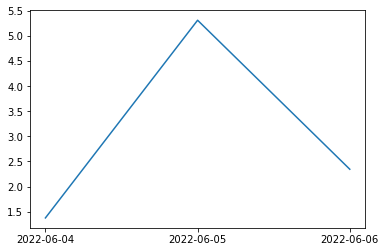

In [215]:
plt.plot(senti_time_series.keys(),senti_time_series.values())

**Attention Score**

In [17]:
def post_attention_score(data):
    """
    Generates attention scores for a given set of text data (posts/comments)
    using VADERsentiment.
    Attention = number of mentions of 'inflation' or 'inflationary'/number of words in post.
    Expects a dataframe column as input.
    """
    
    attention_score = []
    
    
    for i in data:
        
        attention = 0

        if "inflation" in i.lower() or "inflationary" in i.lower():
            attention += 1
            
        attention_score.append(attention/len(i))

        
    return attention_score

In [18]:
data['body']

0     I'm wondering how much interest is accruing on...
1     It can absolutely make sense to invest some of...
2     I think you mean savings rather than investmen...
3     &gt;with everything that is cracking off at th...
4     The budget is way off mate. For starters you d...
5     Prices are sky high at the moment as is inflat...
6     I’d say right now is risky with the world econ...
7     I'm planning to buy in less than five years (h...
8     It's tempting and I'd have the most fun doing ...
9     Who said Bitcoin will be worth Fuck all ? I wo...
10    &gt;"If you start investing at 25 with £100 a ...
11    You shouldn't reduce the percentage - as you e...
12    &gt;However, with Inflation being insane at th...
13    I don't know what a DRO is, but I AM weighing ...
14    I'd only say that when investments are tanking...
15    In addition to the other points raised here, N...
16    Couple of things overlooked:\n\n1. The benefit...
17    It's a very generous scheme - especially a

In [20]:
data['attention_score'] = post_attention_score(data['body'])
data['attention_score']

0     0.001626
1     0.000712
2     0.001199
3     0.002950
4     0.004405
5     0.004739
6     0.001770
7     0.003175
8     0.003460
9     0.004098
10    0.004016
11    0.002747
12    0.000673
13    0.003831
14    0.004274
15    0.001862
16    0.000852
17    0.001504
18    0.001613
19    0.019231
20    0.005376
21    0.001193
22    0.001200
23    0.018182
24    0.005236
Name: attention_score, dtype: float64

In [21]:
def daily_attention(data, score = 'attention_score'):
    
    attention_time_series_df = data[['created',score]]
    
    attention_time_series_dict = {}

    for i in set(attention_time_series_df['created']):
        attention_time_series_dict[i] = 0
        
        
    for i in attention_time_series_dict.keys():
        for j in range(len(attention_time_series_df)):
            if i == attention_time_series_df.iloc[j,0]:
                attention_time_series_dict[i] += attention_time_series_df.iloc[j,1]
    
    return attention_time_series_dict

In [35]:
attention = daily_attention(data)
attention

{'2022-06-04': 0.024617900468135848,
 '2022-06-05': 0.05473128735674118,
 '2022-06-06': 0.0205757908226966}

In [10]:
import matplotlib.pyplot as plt

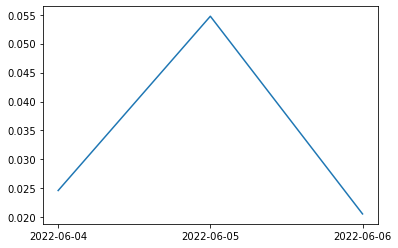

In [36]:
plt.plot(attention.keys(),attention.values())

**Creating Wordclouds**

In [1]:
from wordcloud import WordCloud, STOPWORDS

In [2]:
def get_wordcloud(column):
    """
    Generates a wordcloud for a given text input.
    Expects a dataframe column as input.
    """
    
    stopwords = set(STOPWORDS)
    comment_words = ''
    
    for post in column:
        tokens = post.split()

        for i in range(len(tokens)):
            tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "
    
    wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
    
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)

    plt.show()


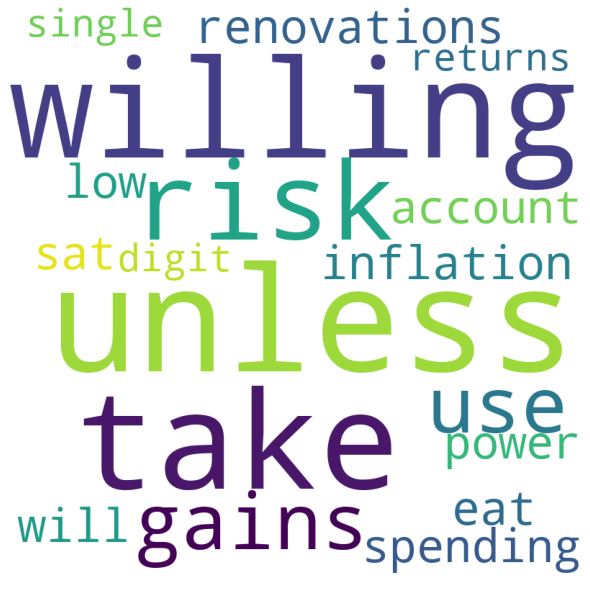

In [11]:
get_wordcloud(data['body'])

In [72]:
def sarcasm_checker(df,score):
    """
    Acts as a sarcasm detection tool based on certain tests (e.g. punctuation, capitalisation).
    Expects a dataframe and relvant sentiment score metric (column name) as input.
    NB To be used *after* doing sentiment analysis with VADER.
    """
    #Conditions for sarcasm
    for i in df['body']:
        #Exclamation mark count
        if i.count("!") > 3:
            df['sarcasm'] = True

        caps_count = 0

        for letter in i:
            if letter.isupper() == True:
                caps_count += 1

            if caps_count > len(i.split()):
                df['sarcasm'] = True
            
        else:
            df['sarcasm'] = False
    
    #Final - sarcasm indicator
    for sarc in df['sarcasm']:
        if sarc == True and df[score] > 0:
            df['sentiment_final'] = df[score] * -1
        else:
            df['sentiment_final'] = df[score]
            
    return df 

In [73]:
data['score'] = vader_score(data['body'])

In [74]:
sarcasm_checker(data,'score')

,Unnamed: 0,all_awardings,archived,associated_award,author,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,...,subreddit,subreddit_id,subreddit_name_prefixed,subreddit_type,top_awarded_type,total_awards_received,treatment_tags,unrepliable_reason,sarcasm,sentiment_final
0,0,[],False,NaN,AcanthisittaFit1066,NaN,points,[],fcb4f480-ccb2-11e4-8c0e-22000b339303,5,...,UKPersonalFinance,t5_2wkka,r/UKPersonalFinance,public,NaN,0,[],NaN,False,0.9163
1,1,[],False,NaN,traumascares,NaN,points,[],fcb4f480-ccb2-11e4-8c0e-22000b339303,27,...,UKPersonalFinance,t5_2wkka,r/UKPersonalFinance,public,NaN,0,[],NaN,False,0.9034
2,2,[],False,NaN,Luke_Surl,NaN,points,[],fcb4f480-ccb2-11e4-8c0e-22000b339303,13,...,UKPersonalFinance,t5_2wkka,r/UKPersonalFinance,public,NaN,0,[],NaN,False,0.9079
3,3,[],False,NaN,fightmaxmaster,NaN,points,[],fcb4f480-ccb2-11e4-8c0e-22000b339303,103,...,UKPersonalFinance,t5_2wkka,r/UKPersonalFinance,public,NaN,0,[],NaN,False,-0.9347
4,4,[],False,NaN,Wonderful_Nerve_8308,NaN,NaN,[],NaN,NaN,...,UKPersonalFinance,t5_2wkka,r/UKPersonalFinance,public,NaN,0,[],NaN,False,-0.2732
5,5,[],False,NaN,beepboopbananas3298,NaN,points,[],fcb4f480-ccb2-11e4-8c0e-22000b339303,5,...,UKPersonalFinance,t5_2wkka,r/UKPersonalFinance,public,NaN,0,[],NaN,False,-0.1779
6,6,[],False,NaN,Narradisall,NaN,points,[],fcb4f480-ccb2-11e4-8c0e-22000b339303,60,...,UKPersonalFinance,t5_2wkka,r/UKPersonalFinance,public,NaN,0,[],NaN,False,0.8250
7,7,[],False,NaN,Crot4le,NaN,points,[],fcb4f480-ccb2-11e4-8c0e-22000b339303,19,...,UKPersonalFinance,t5_2wkka,r/UKPersonalFinance,public,NaN,0,[],NaN,False,0.1779
8,8,[],False,NaN,hmm_interestingg,NaN,points,[],fcb4f480-ccb2-11e4-8c0e-22000b339303,-,...,UKPersonalFinance,t5_2wkka,r/UKPersonalFinance,public,NaN,0,[],NaN,False,-0.6048
9,9,[],False,NaN,Crypto-hercules,NaN,NaN,[],NaN,NaN,...,UKPersonalFinance,t5_2wkka,r/UKPersonalFinance,public,NaN,0,[],NaN,False,0.3561


**Subreddit Aggregation**

In [ ]:
from psaw import PushshiftAPI

In [ ]:
def subreddit_aggregation(data_type,**kwargs):
    """
    Identifies the top X (= 'size' parameter) subreddits within which the 'query' term is mentioned.
    data_type = 'comments' or 'submissions'
    **kwargs refer to the parameters relevant to the Pushshift API (see https://github.com/pushshift/api).
    """
    base_url = f"https://api.pushshift.io/reddit/search/{data_type}/"
    payload = kwargs
    r = requests.get(base_url, params=payload)
    df = pd.json_normalize(r.json()['data'])
    return df['subreddit']
#    df = pd.json_normalize(r.json()['data'])
    #return r.json()

In [ ]:
#Example call
subreddit_aggregation(data_type = "submission", q="uk inflation",size=10,
              start_time=int(dt.datetime(2022,1,1).timestamp()),
              end_time=int(dt.datetime(2022,6,1).timestamp()))